In [28]:
!pip install deepface

In [29]:
from deepface import DeepFace

In [30]:
import os
import cv2
import glob
import fnmatch
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
path = '/content/drive/MyDrive/PersianFace'

dir_list = os.listdir(path)
print(dir_list)

['Bahram_Radan', 'Ehsan_Alikhani', 'Behnam_Bani', 'Asghar_Farhadi', 'Ebi', 'Bahare_Rahnama', 'Ali_Khamenei', 'Ali_Daei', 'Dariush_Arjmand', 'Adel_FerdowsiPour', 'Golshifteh_Farahani', 'Elham_Hamidi', 'Elnaz_Shakerdoost', 'Leyla_Hatami', 'Mehran_Ghafourian', 'Mahnaz_Afshar', 'Javad_Khiabani', 'Javad_Razavian', 'Hootan_Shakiba', 'Hamid_Lolaei', 'Mohsen_Chavoshi', 'Parinaz_Izadyar', 'Parsa_Pirozfar', 'Parviz_Parastooee', 'Siamak_Ansari', 'Tannaz_Tabatabaee', 'Shahab_Hosseini', 'Siavash_Ghomayshi', 'Mehran_Modiri', 'Taraneh_Alidoosti']


In [32]:
for celebrity in dir_list :
  print(celebrity)

Bahram_Radan
Ehsan_Alikhani
Behnam_Bani
Asghar_Farhadi
Ebi
Bahare_Rahnama
Ali_Khamenei
Ali_Daei
Dariush_Arjmand
Adel_FerdowsiPour
Golshifteh_Farahani
Elham_Hamidi
Elnaz_Shakerdoost
Leyla_Hatami
Mehran_Ghafourian
Mahnaz_Afshar
Javad_Khiabani
Javad_Razavian
Hootan_Shakiba
Hamid_Lolaei
Mohsen_Chavoshi
Parinaz_Izadyar
Parsa_Pirozfar
Parviz_Parastooee
Siamak_Ansari
Tannaz_Tabatabaee
Shahab_Hosseini
Siavash_Ghomayshi
Mehran_Modiri
Taraneh_Alidoosti


In [33]:
def generate_dataset(img_path , celebrity , count) :
  embedding_objs = DeepFace.represent(img_path= img_path , model_name="ArcFace", enforce_detection=False)
  embedding = embedding_objs[0]["embedding"]
  embedding.append(celebrity)
  embedding.append(count)
  print(embedding)
  return np.array(embedding , dtype=object)




In [34]:
columns=[]

for count in range(512):
  columns.append('feature' + str(count))

columns.append('label')
columns.append('label_count')
print(columns)



['feature0', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30', 'feature31', 'feature32', 'feature33', 'feature34', 'feature35', 'feature36', 'feature37', 'feature38', 'feature39', 'feature40', 'feature41', 'feature42', 'feature43', 'feature44', 'feature45', 'feature46', 'feature47', 'feature48', 'feature49', 'feature50', 'feature51', 'feature52', 'feature53', 'feature54', 'feature55', 'feature56', 'feature57', 'feature58', 'feature59', 'feature60', 'feature61', 'feature62', 'feature63', 'feature64', 'feature65', 'feature66', 'feature67', 'feature68', 'feature69', 'feature70', 'feature71', 'feature72', 'feature73', 'feature74', 'feature75', 'feature76', 'feature

In [ ]:
Data = []
count = -1
for celebrity in dir_list :
  print(celebrity)
  dir_image = '/content/drive/MyDrive/PersianFace/' + celebrity
  data_path = os.path.join(dir_image, '*g')
  files = glob.glob(data_path)
  count += 1
  for File in files:
    data = generate_dataset(File , celebrity , count)
    Data.append(data)
  print(Data)


In [36]:
dataframe = pd.DataFrame(Data,columns=columns)
dataframe.to_csv('Dataset.csv',index=False)


In [37]:
data = pd.read_csv('Dataset.csv')
data

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,label,label_count
0,-0.073539,0.532472,-0.017975,-0.388165,0.005516,0.111744,-0.029787,0.148598,-0.071474,0.016979,...,0.079555,-0.244035,0.223337,-0.260306,0.099324,0.216807,0.068929,-0.494616,Bahram_Radan,0
1,-0.407272,1.142256,-0.241932,-0.944261,-0.036765,0.693376,-0.398453,-0.299904,0.025124,-0.064245,...,0.824811,-1.310599,0.295098,-0.463236,-0.085416,-0.025423,-0.803852,-2.093665,Bahram_Radan,0
2,0.062198,0.274320,0.102746,0.187975,0.236909,0.005364,0.194683,-0.192909,0.569764,0.167040,...,-0.004103,-0.022593,0.283998,-0.319368,-0.075604,-0.294132,0.374689,0.201105,Bahram_Radan,0
3,0.088835,0.424528,0.151462,0.125330,0.001227,0.109901,0.283745,-0.213615,0.411674,0.073703,...,0.146300,-0.058956,0.282110,-0.216786,-0.049504,0.195647,0.581767,0.276889,Bahram_Radan,0
4,-0.148081,0.502009,-0.093313,-0.451497,0.022562,0.239780,-0.174336,-0.127101,-0.022226,-0.077278,...,0.331493,-0.637377,0.146954,-0.239718,-0.039674,-0.007611,-0.401004,-0.954427,Bahram_Radan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,-0.382195,0.836607,-0.253352,-0.519521,-0.093697,0.490086,-0.188238,-0.111835,0.038907,-0.033555,...,0.529527,-0.925656,0.351931,-0.278704,-0.056961,0.053183,-0.496061,-1.419079,Taraneh_Alidoosti,29
1722,0.153010,0.295141,0.056225,-0.039806,-0.074119,-0.088459,-0.216450,-0.084852,-0.040066,-0.127433,...,-0.187565,-0.100080,0.117857,-0.064893,-0.143239,0.473839,0.239069,0.031931,Taraneh_Alidoosti,29
1723,-0.043083,-0.016352,0.079556,-0.508734,-0.256516,0.119429,-0.157973,0.179302,-0.220142,-0.221468,...,-0.114330,-0.129674,0.351108,0.072199,-0.064502,0.279232,0.203568,-0.047292,Taraneh_Alidoosti,29
1724,0.154810,0.147008,0.107926,0.010837,0.082153,0.005968,-0.111574,-0.205261,-0.047267,-0.237677,...,-0.339670,-0.225460,0.256562,-0.089763,-0.311278,0.203809,-0.068465,-0.070118,Taraneh_Alidoosti,29


In [42]:
X = np.array(data.iloc[: , 0:512].values)
Y = np.array(data['label_count'])

In [43]:
print(X.shape , Y.shape)

(1726, 512) (1726,)


In [44]:
Y = Y.reshape(-1,1)

In [45]:
X_train  , X_test , Y_train , Y_test = train_test_split(X,Y , test_size=0.3 , shuffle=True )


In [46]:
X_train.shape , Y_train.shape , X_test.shape , Y_train.shape

((1208, 512), (1208, 1), (518, 512), (1208, 1))

In [96]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,input_dim=512, activation='sigmoid') ,
    tf.keras.layers.Dense(128,activation='relu') ,
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(30, activation='softmax')
])

In [97]:
model.compile(optimizer='adam' ,
              loss='sparse_categorical_crossentropy' ,
              metrics=['accuracy']
)

In [98]:
output = model.fit(X_train , Y_train , epochs=150)

loss , accuracy = model.evaluate(X_test , Y_test)

Epoch 1/150
38/38 [==============================] - 2s 4ms/step - loss: 3.3096 - accuracy: 0.0902
Epoch 2/150
38/38 [==============================] - 0s 4ms/step - loss: 2.7653 - accuracy: 0.3336
Epoch 3/150
38/38 [==============================] - 0s 3ms/step - loss: 1.7722 - accuracy: 0.5232
Epoch 4/150
38/38 [==============================] - 0s 3ms/step - loss: 1.2253 - accuracy: 0.6523
Epoch 5/150
38/38 [==============================] - 0s 4ms/step - loss: 0.9544 - accuracy: 0.7334
Epoch 6/150
38/38 [==============================] - 0s 3ms/step - loss: 0.8170 - accuracy: 0.7732
Epoch 7/150
38/38 [==============================] - 0s 4ms/step - loss: 0.7711 - accuracy: 0.7806
Epoch 8/150
38/38 [==============================] - 0s 3ms/step - loss: 0.7044 - accuracy: 0.7988
Epoch 9/150
38/38 [==============================] - 0s 4ms/step - loss: 0.6821 - accuracy: 0.8088
Epoch 10/150
38/38 [==============================] - 0s 3ms/step - loss: 0.6489 - accuracy: 0.8162
Epoch 11/

In [99]:
model.save('weights/FaceRecognition_model.h5')

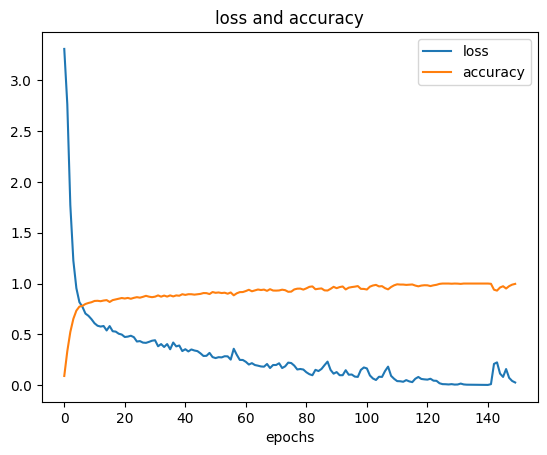

In [100]:
plt.plot(output.history["loss"] , label='loss')
plt.plot(output.history["accuracy"] , label='accuracy')
plt.title('loss and accuracy')
plt.xlabel("epochs")
plt.legend()
plt.show()